# Cálculos de odometría para robot con tracción diferencial 


## Calculo de radio con velocidades constantes 

Para calcular el radio de la circunferencia trazada por el robot con velocidad lineal y angular constante se pude utilizar la expresión que relaciona el parámetro lineal con el angular mediante el radio. 
$ V = \omega R $ 

In [4]:
v1 = 0.2 
w1 = 0.2 
r = v1/w1 
print("El radio de la circunferencia trazada es", r)


El radio de la circunferencia trazada es 1.0


## Calculo de velocidades para un radio determinado 

Para calcular las velocidades del cento odométrico necesarias para describir cierto radio se puede hacer la operación anterior de manera inversa, y se debe tener en cuenta los límites máximos de velocidades. [Especificaciones](https://emanual.robotis.com/docs/en/platform/turtlebot3/features/)

$$ V_{max} = 0.22 \tfrac{m}{s}$$
$$ \omega_{max} = 2.84 \tfrac{rad}{s}$$ 

Eligiendo una de las velocidas arbitrariamente y respetando el límite se puede encontrar la otra que satisfaga la ecuación 


In [7]:
v2 = 0.22 
R = 1.5 
w = v2/R 
print(w, "rad/s")

0.14666666666666667 rad/s


## Calculo de velocidades de las ruedas 

Las velocidades lineales y angulares del centro odométrico se relacionan con las velocidades angulares de las ruedas izquierda y derecha mediante las expresiones: 

$\begin{align}
           \omega_{OD}  &= R \left ( \frac{\omega _R - \omega _L}{b} \right )  \label{ec: velocidad odometrica y angulares de rueda} \\ 
           v_{OD}  &= R \left ( \frac{\omega _R + \omega _L}{2} \right )  \label{ec: velocidad angular y angulares de rueda}  
 \end{align}$ 
 
 
 Las especificaciones mecánicas son: 
 * R = 0.033 m 
 * b = 0.178 m
 

In [33]:
R = 0.033
b = 0.178 


Con esto obtenemos un sistema de dos ecuaciones: 

$   \begin{align}
         \omega _R - \omega _L &=  \frac{\omega _{OD}}{R} \cdot b \\ 
         \omega _R + \omega _L &= \frac{v _{OD}}{R} \cdot 2   
     \end{align}
     $ 
     
     
 Resolviendo el sistema de forma matricial: 
 
 $ x = A^{-1}B $ 


In [36]:
import numpy as np
Wod = w 
Vod = v2 
y1 = b * (Wod/R)
y2 = 2 * (Vod/R)

A = np.matrix([[1,-1],[1, 1]])
B = np.matrix([[y1],[y2]])
x = (A**-1)*B
wR = x[0]
wL = x[1]
print(x)


[[7.06222222]
 [6.27111111]]


 La velocidad angular de las ruedas: 
 
 $$\omega _R = 7.06~\tfrac{rad}{s}$$
 
 $$ \omega _L = 6.2171~\tfrac{rad}{s}$$ 

 Para el cálculo de las velocidades **lineales** se utiliza la relación entre este parámtro lineal y angular, el **radio** 
 
 

In [39]:
vR = wR*R
vL = wL*R 

print(vR,vL)

[[0.23305333]] [[0.20694667]]


 Las velocidades lineales de las ruedas 
 
  $$\boxed{v_R = 0.2330~\tfrac{m}{s}}$$
 
 $$ \boxed{v_L = 0.206 ~\tfrac{rad}{s}}$$ 
 
 

## Registro de datos para robot teleoperado

Una vez lanzado la simulación de TurtleBot3 en Gazebo, y el nodo de teleoperación: ` roslaunch turtlebot3_teleop turtlebot3_teleop_key.launch `  

Desde una nueva terminal se ejecuta el script de python y se redirecciona su salida a un archivo de texto 

` python3 dump_odom.py > log_teleop.txt `

En la primer columna está el tiempo de ejecución. En las dos siguientes coordenadas x,y. 


In [13]:
import pandas as pd 
import matplotlib.pylab as plt 

#El separador es un caracter de tab
#git clone 
data = pd.read_csv("./log_teleop.txt", sep= "\t", header=None) 


### Grafico del camino

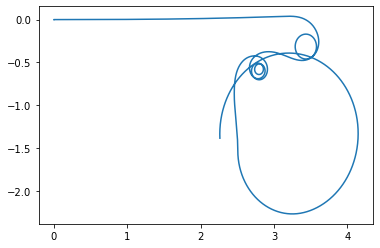

In [14]:
#Elimino los datos que sean nulos (para graficar)

PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

Camino = plt.plot(PuntosX,PuntosY)

### Grafico de la trayectoria

Que es la trayectoria...

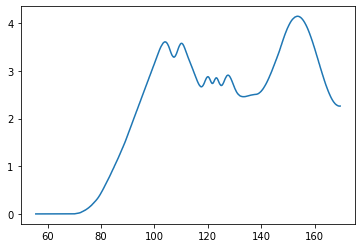

In [22]:
PuntosP = [pose for pose in data[1] if pose != 0] 
PuntosT = [t for t in data[0] if t != 0] 

plt.plot(PuntosT,PuntosP)

### Gráfico de velocidades

Las velocidades se encuentran en las últimas dos columnas (5 y 6) 

3423


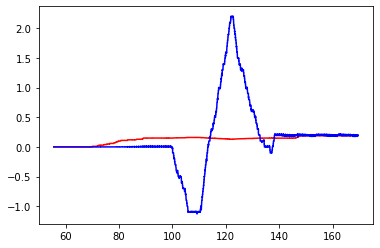

In [21]:
PuntosT = [t for t in data[0] if t != 0] 
PuntosV = [x for x in data[4] if x != 0] 
PuntosW = [y for y in data[5] if y != 0]

print(len(data))

plt.plot(PuntosT,PuntosV, color ='red')
plt.plot(PuntosT,PuntosW, color ='blue')


## Registro de datos de robot para camino circular 

Una vez lanzado la simulación de TurtleBot3 en Gazebo y publicando las velocidades lineales y angulares para un camino circular

`rostopic pub -1 /cmd_vel geometry_msgs/Twist '[0.2,0,0]' '[0,0,0.2]' `
En una nueva terminal ejecutamos el script y su salida la direccionamos a un archivo de texto 

` python3 dump_odom.py > log_mov_circular.txt ` 

En la primer columna está el tiempo de ejecución. En las dos siguientes coordenadas x,y. 



In [24]:
import pandas as pd 
import matplotlib.pylab as plt 

#El separador es un caracter de tab
#git clone 
data = pd.read_csv("./log_mov_circular.txt", sep= "\t", header=None) 



### Gráfico del camino 


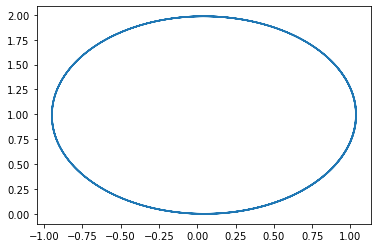

In [26]:
#Elimino los datos que sean nulos (para graficar)

PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

plt.plot(PuntosX,PuntosY) 


### Gráfica de la trayectoria

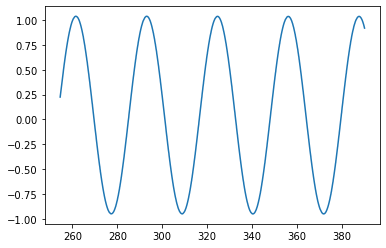

In [25]:
PuntosP = [pose for pose in data[1] if pose != 0] 
PuntosT = [t for t in data[0] if t != 0] 

plt.plot(PuntosT,PuntosP)

### Gráfica de velocidades 

4062


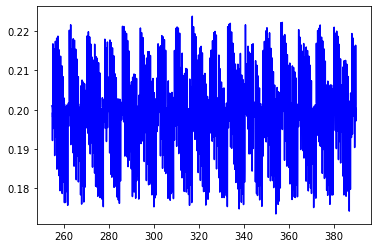

In [29]:
PuntosT = [t for t in data[0] if t != 0] 
PuntosV = [x for x in data[4] if x != 0] 
PuntosW = [y for y in data[5] if y != 0]

print(len(data))

plt.plot(PuntosT,PuntosW, color ='blue')

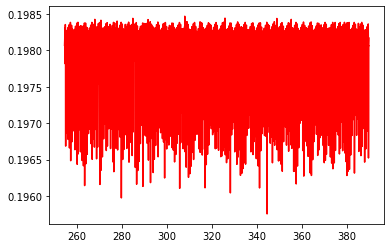

In [28]:
plt.plot(PuntosT,PuntosV, color ='red')